<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

C:\Users\sudhe\AppData\Local\Temp\ipykernel_24100\308788083.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'File and Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df["category_id"]==1),"category_name"]="File and Animation"


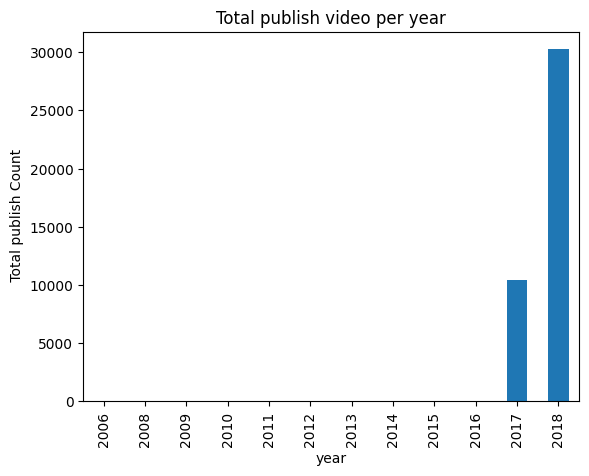

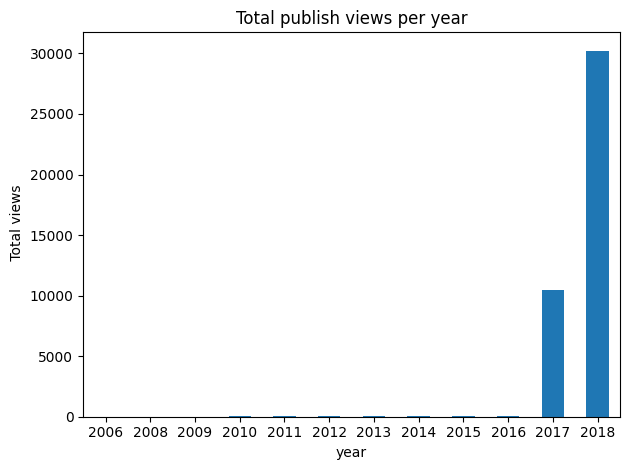

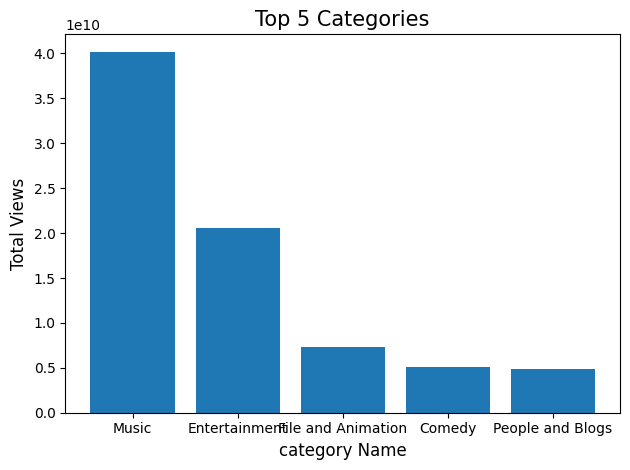

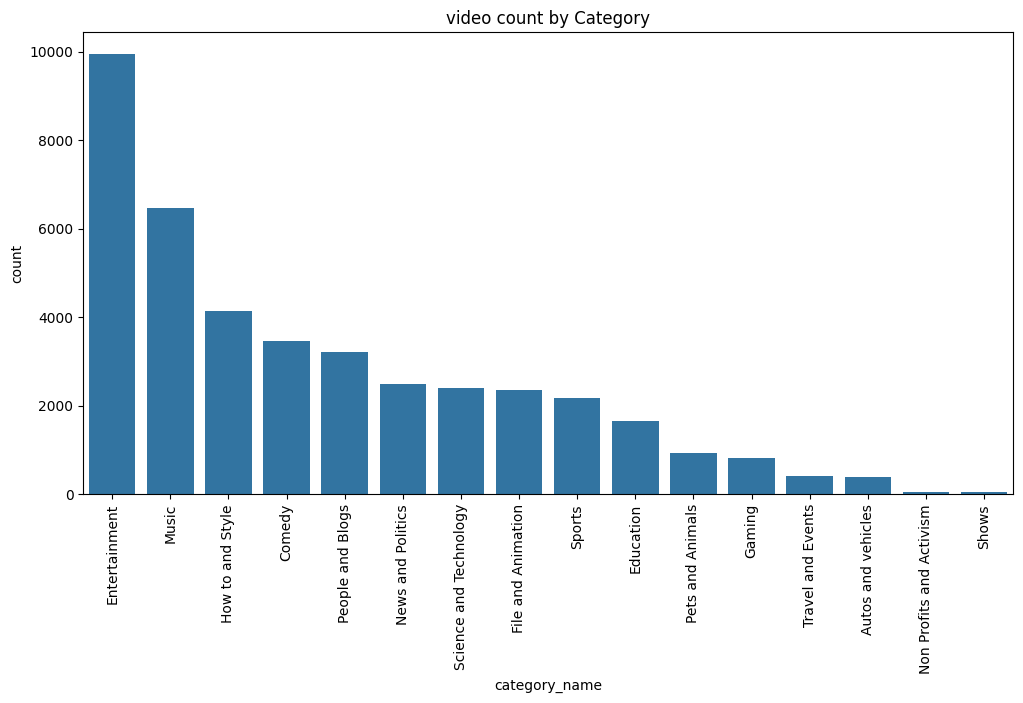

C:\Users\sudhe\AppData\Local\Temp\ipykernel_24100\308788083.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videos_per_hour.index,y=videos_per_hour.values,palette='rocket')


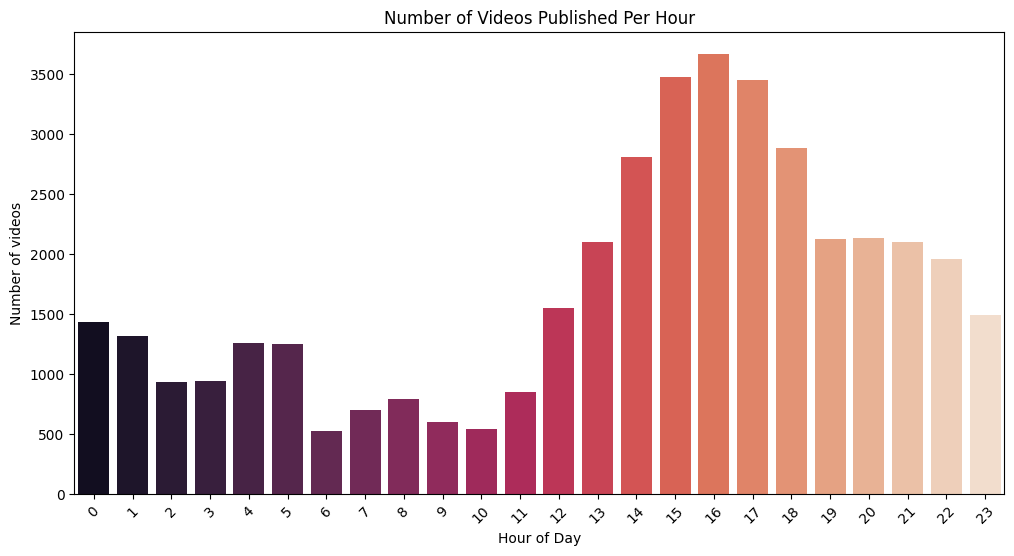

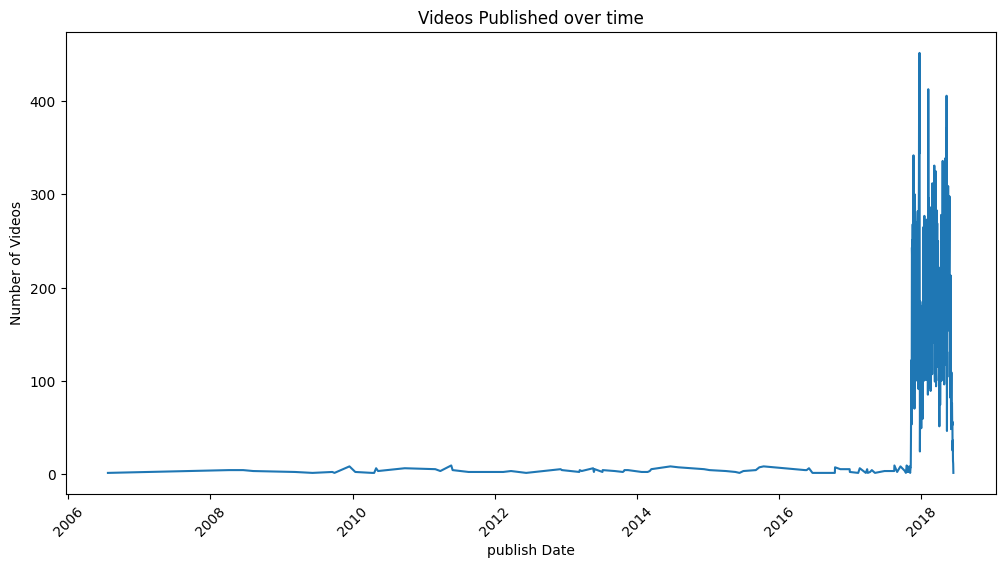

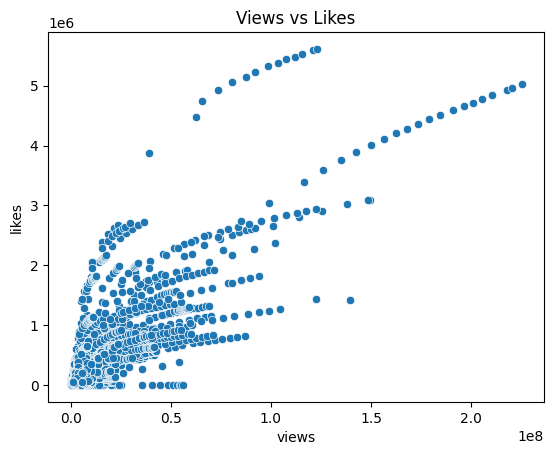

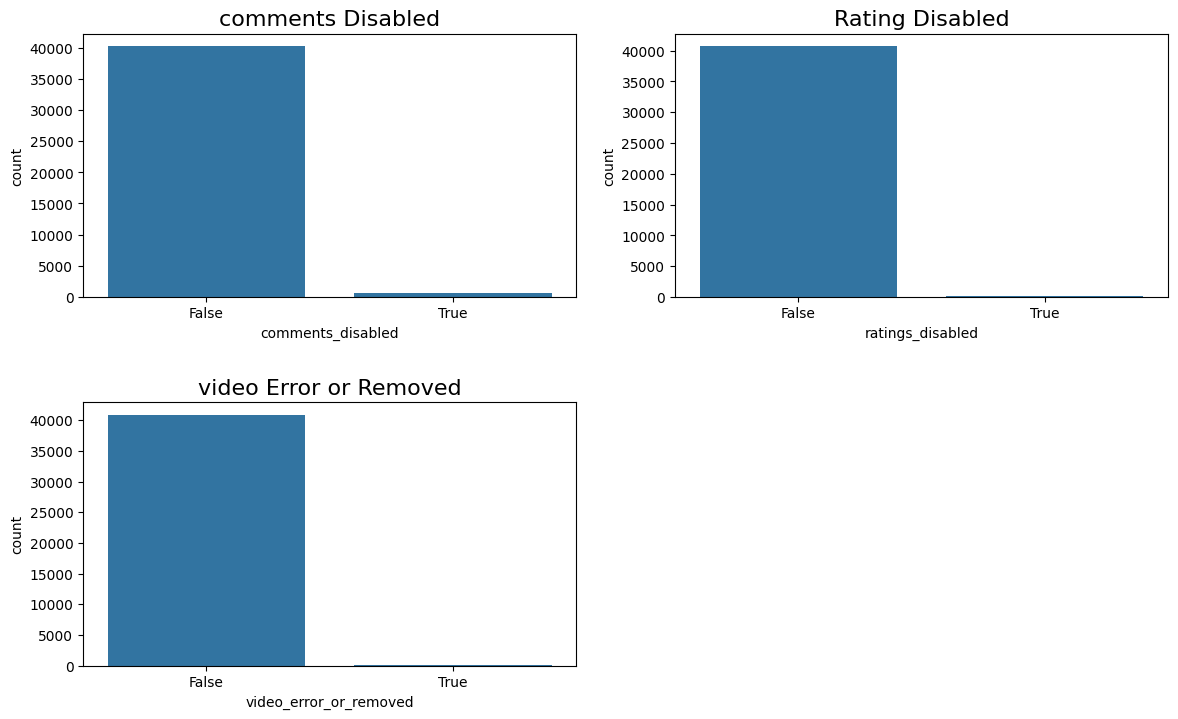

0.8491785476230503

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# In[14]:


df = pd . read_csv('USvideos.csv')


# In[15]:


df.head()


# In[16]:


df.shape


# In[17]:


df=df.drop_duplicates()
df.shape


# In[18]:


df.describe()


# In[19]:


df.info()


# In[24]:


columns_to_remove=['thumbnail_link','description']
df=df.drop(columns=columns_to_remove)
df.info()


# In[27]:


from datetime import datetime


# In[28]:


import datetime


# In[30]:


df["trending_date"]=df["trending_date"].apply(lambda x : datetime.datetime.strptime(x, '%y.%d.%m'))
df.head(3)


# In[31]:


df['publish_time']=pd.to_datetime(df['publish_time'])
df.head(2)


# In[32]:


df['publish_month']=df['publish_time'].dt.month
df['publish_day']=df['publish_time'].dt.day
df['publish_hour']=df['publish_time'].dt.hour
df.head(2)


# In[43]:


print(sorted(df["category_id"].unique()))


# In[44]:


df['category_name']=np.nan
df.loc[(df["category_id"]==1),"category_name"]="File and Animation"
df.loc[(df["category_id"]==2),"category_name"]="Autos and vehicles"
df.loc[(df["category_id"]==10),"category_name"]="Music"
df.loc[(df["category_id"]==15),"category_name"]="Pets and Animals"
df.loc[(df["category_id"]==17),"category_name"]="Sports"
df.loc[(df["category_id"]==19),"category_name"]="Travel and Events"
df.loc[(df["category_id"]==20),"category_name"]="Gaming"
df.loc[(df["category_id"]==22),"category_name"]="People and Blogs"
df.loc[(df["category_id"]==23),"category_name"]="Comedy"
df.loc[(df["category_id"]==24),"category_name"]="Entertainment"
df.loc[(df["category_id"]==25),"category_name"]="News and Politics"
df.loc[(df["category_id"]==26),"category_name"]="How to and Style"
df.loc[(df["category_id"]==27),"category_name"]="Education"
df.loc[(df["category_id"]==28),"category_name"]="Science and Technology"
df.loc[(df["category_id"]==29),"category_name"]="Non Profits and Activism"
df.loc[(df["category_id"]==30),"category_name"]="Movies"
df.loc[(df["category_id"]==43),"category_name"]="Shows"
df.head()


# In[48]:


df['year']=df['publish_time'].dt.year
yearly_counts=df.groupby('year')['video_id'].count()

#create a bar chart
yearly_counts.plot(kind='bar' , xlabel='year' ,ylabel=' Total publish Count', title='Total publish video per year')

#show the chart
plt.show()


# In[49]:


#Group by year and sum the views for each year
yearly_views=df.groupby('year')['views'].sum()

#create a bar chart
yearly_counts.plot(kind='bar' , xlabel='year' ,ylabel=' Total views', title='Total publish views per year')
plt.xticks(rotation=0)
plt.tight_layout()

#show the  bar chart
plt.show()


# In[51]:


#Group the data by 'catrrgory_name' and calculate the sum of 'views' in each category
category_views=df.groupby('category_name')['views'].sum().reset_index()

#Sort the categiries by views in descending order
top_categories=category_views.sort_values(by='views', ascending=False).head(5)

#create a bar plot to visualize the top 5 categories
plt.bar(top_categories['category_name'],top_categories['views'])
plt.xlabel('category Name',fontsize=12)
plt.ylabel('Total Views',fontsize=12)
plt.title('Top 5 Categories',fontsize=15)
plt.tight_layout()
plt.show()



# In[52]:


plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('video count by Category')
plt.show()


# In[55]:


#Count the number of videos published perhour
videos_per_hour=df['publish_hour'].value_counts().sort_index()

#create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=videos_per_hour.index,y=videos_per_hour.values,palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('Hour of Day')
plt.ylabel('Number of videos')
plt.title('Number of Videos Published Per Hour')
plt.show()


# In[59]:


df['publish_time']=pd.to_datetime(df['publish_time'])
df['publish_date']=df['publish_time'].dt.date
video_count_by_date=df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.xticks(rotation=45)
plt.xlabel('publish Date')
plt.ylabel('Number of Videos')
plt.title('Videos Published over time')
plt.show()


# In[60]:


#Scatter plot between 'views' and 'likes'
sns.scatterplot(data=df,x='views',y='likes')
plt.xlabel('views')
plt.ylabel('likes')
plt.title('Views vs Likes')
plt.show()


# In[62]:


plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.subplot(2,2,1)
g=sns.countplot(x='comments_disabled',data=df)
g.set_title("comments Disabled",fontsize=16)
plt.subplot(2,2,2)
g1=sns.countplot(x='ratings_disabled',data=df)
g1.set_title("Rating Disabled",fontsize=16)
plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed',data=df)
g2.set_title("video Error or Removed",fontsize=16)
plt.show()


# In[64]:


corr_matrix=df['views'].corr(df['likes'])
corr_matrix


# In[ ]:




